In [7]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt

In [2]:
# Initialize empty dataframes for each metric
loss_df = pd.DataFrame()
accuracy_df = pd.DataFrame()
val_loss_df = pd.DataFrame()
val_accuracy_df = pd.DataFrame()

In [4]:
model_list = [
                'ernie_abstract', 'ernie_wiki', 'ernie_balMerg', 'ernie_fullMerg',
                't5_abstract',    't5_wiki',    't5_balMerg',    't5_fullMerg',
                'xlnet_abstract', 'xlnet_wiki', 'xlnet_balMerg', 'xlnet_fullMerg'
             ]

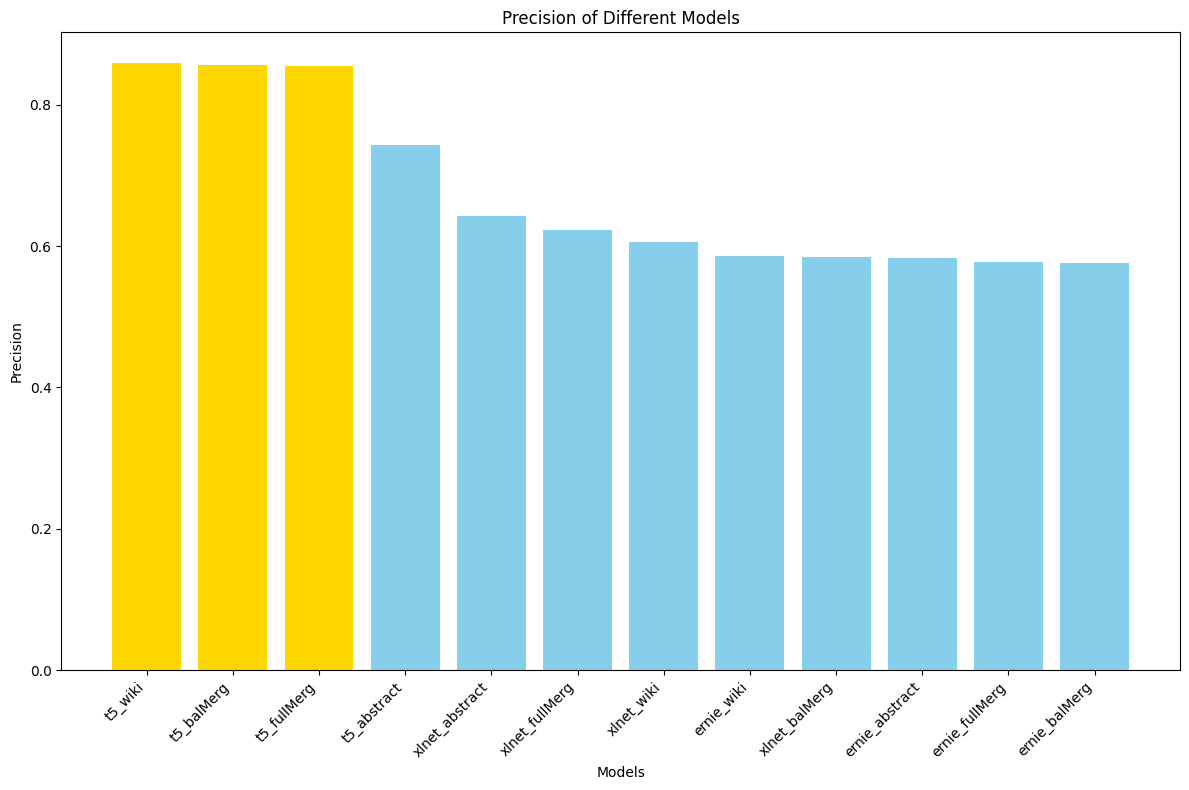

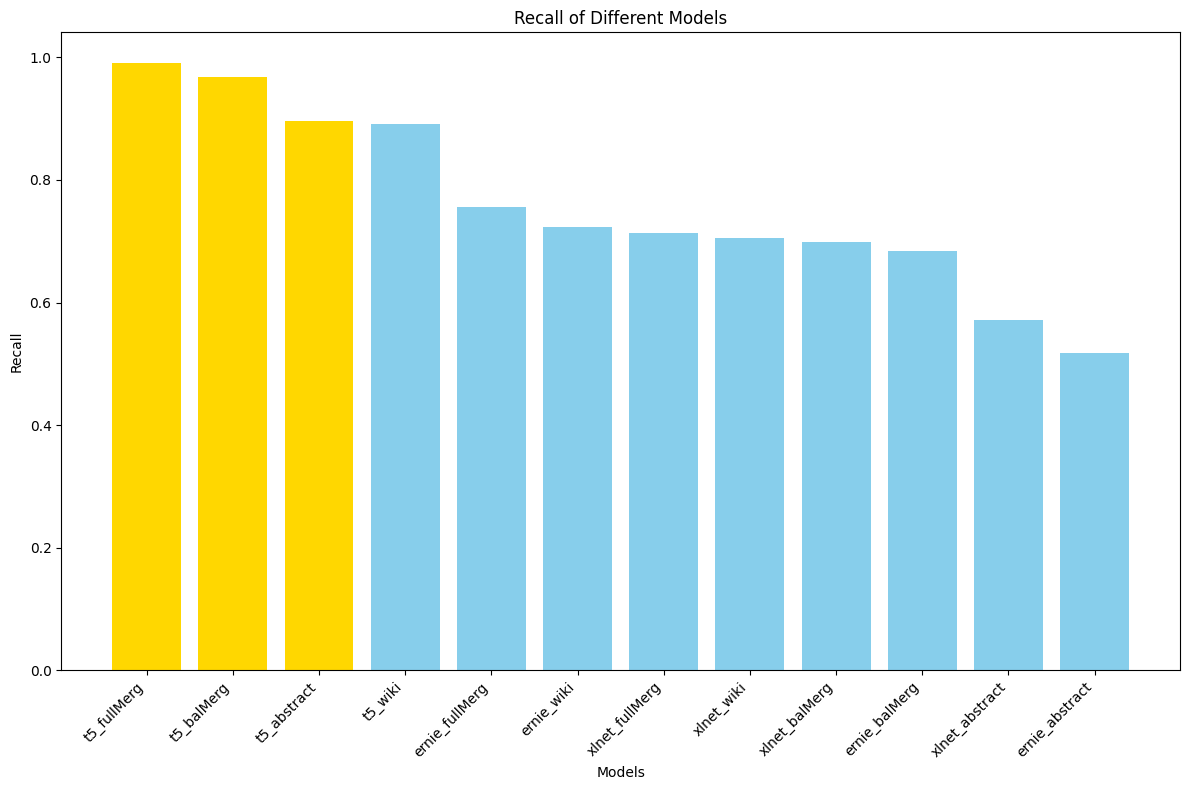

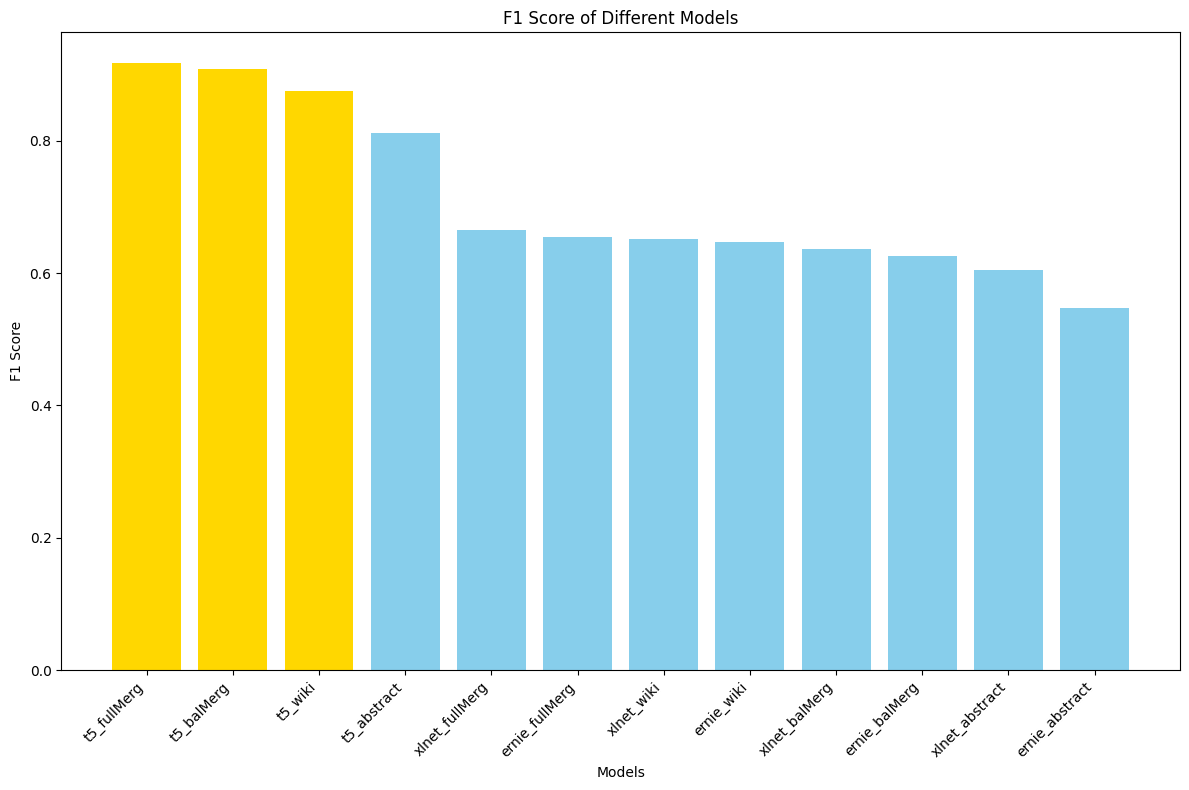

In [13]:
# Dictionaries to store model name and corresponding scores
precision_scores = {}
recall_scores = {}
f1_scores = {}

# Read the scores from each file
for model_name in model_list:
    file_name = f"f1score-history/{model_name}.txt"  # update the file path
    with open(file_name, 'r') as file:
        content = file.read()
        # Extract the scores using regex
        precision = float(re.search(r'Precision:\s*([\d.]+)', content).group(1))
        recall = float(re.search(r'Recall:\s*([\d.]+)', content).group(1))
        f1_score = float(re.search(r'F1 Score:\s*([\d.]+)', content).group(1))
        
        precision_scores[model_name] = precision
        recall_scores[model_name] = recall
        f1_scores[model_name] = f1_score

# Function to plot bar chart for a given metric
def plot_metric(scores, metric_name):
    sorted_models = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    models, values = zip(*sorted_models)
    
    # Assign colors: different color for top 3, another color for the rest
    colors = ['gold' if i < 3 else 'skyblue' for i in range(len(models))]
    
    plt.figure(figsize=(12, 8))
    plt.bar(models, values, color=colors)
    plt.xlabel('Models')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} of Different Models')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plotting Precision, Recall, and F1 Score
plot_metric(precision_scores, 'Precision')
plot_metric(recall_scores, 'Recall')
plot_metric(f1_scores, 'F1 Score')

In [4]:
for model in model_list:
    path_file = f'train-history/{model}_history.csv'
    df = pd.read_csv(path_file)

    loss_df[model] = df['loss']
    accuracy_df[model] = df['accuracy']
    val_loss_df[model] = df['val_loss']
    val_accuracy_df[model] = df['val_accuracy']

In [5]:
# Save the combined dataframes to new CSV files
loss_df.to_csv('combined-history/loss_result.csv', index=False)
accuracy_df.to_csv('combined-history/accuracy_result.csv', index=False)
val_loss_df.to_csv('combined-history/val_loss_result.csv', index=False)
val_accuracy_df.to_csv('combined-history/val_accuracy_result.csv', index=False)

In [6]:
# Load the combined CSV files
loss_df = pd.read_csv('combined-history/loss_result.csv')
accuracy_df = pd.read_csv('combined-history/accuracy_result.csv')
val_loss_df = pd.read_csv('combined-history/val_loss_result.csv')
val_accuracy_df = pd.read_csv('combined-history/val_accuracy_result.csv')

In [7]:
def plot_metric(df, metric_name):
    plt.figure(figsize=(10, 6))
    epochs = range(1, len(df) + 1)  # Create a range starting from 1 to the number of epochs
    
    for column in df.columns:
        plt.plot(epochs, df[column], label=column)
        
    plt.title(f'{metric_name} over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel(metric_name)
    plt.xticks(epochs)  # Set x-axis labels to start from 1
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

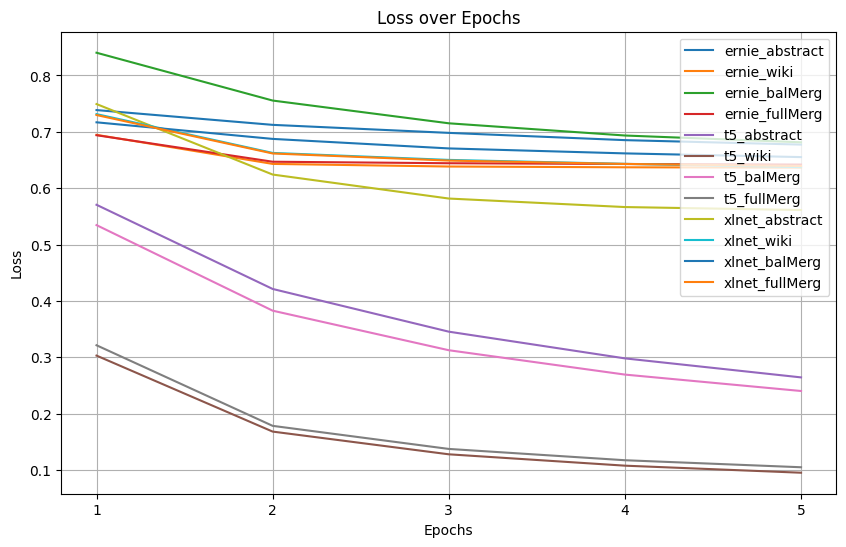

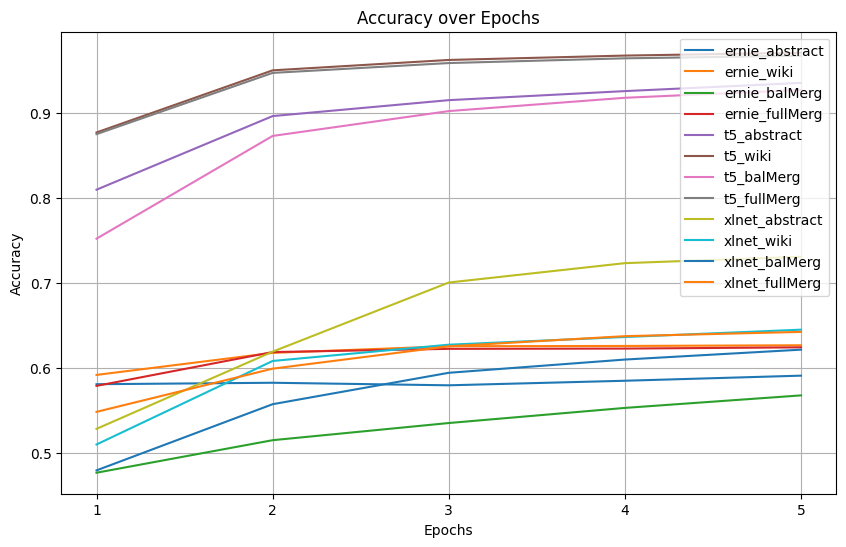

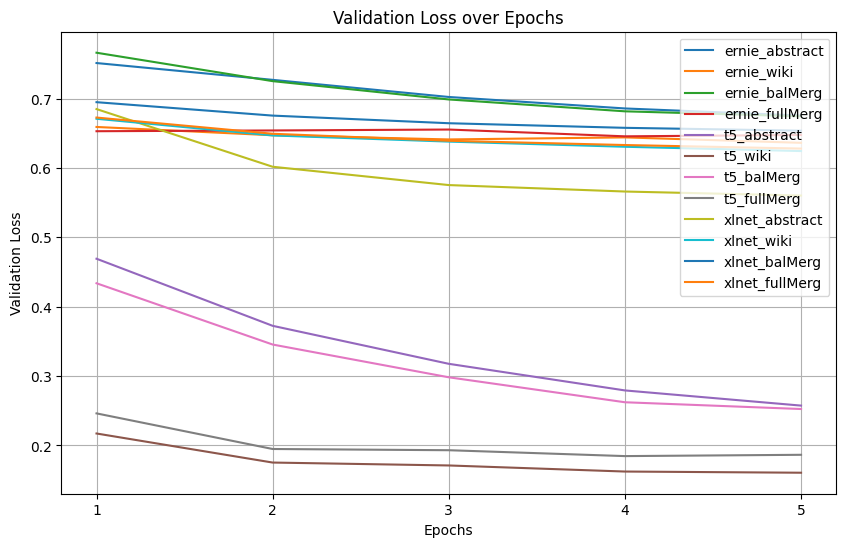

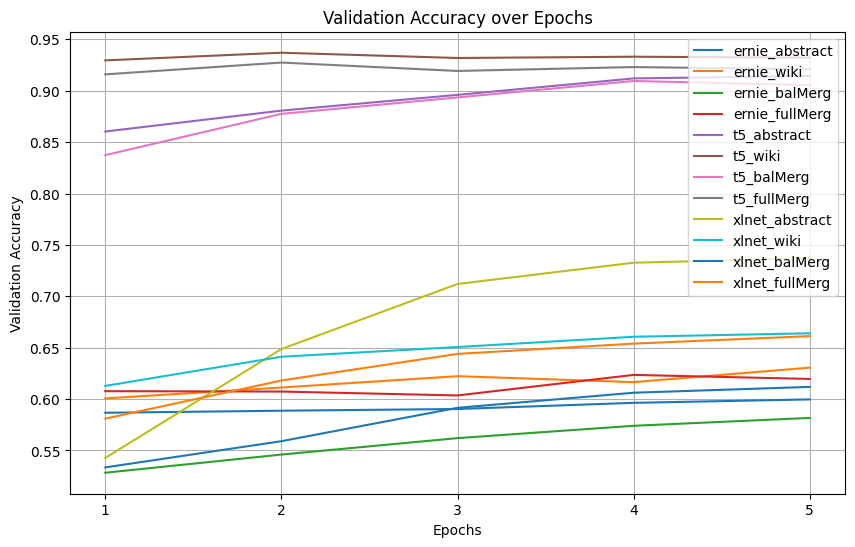

In [8]:
# Plot each metric
plot_metric(loss_df, 'Loss')
plot_metric(accuracy_df, 'Accuracy')
plot_metric(val_loss_df, 'Validation Loss')
plot_metric(val_accuracy_df, 'Validation Accuracy')

# Testing Model to Predict Text

In [ ]:
import tensorflow as tf
import numpy as np
from transformers import AutoTokenizer, TFT5EncoderModel

In [12]:
# Load the model with custom objects
with tf.keras.utils.custom_object_scope({'TFT5EncoderModel': TFT5EncoderModel}):
    model = tf.keras.models.load_model('saved-model/t5_fullMerg.h5')

In [24]:
def preprocess_text(dataframe, tokenizer, max_length=256):
    inputs = tokenizer(dataframe, padding=True, truncation=True, return_tensors="tf", max_length=max_length)
    input_ids = inputs["input_ids"]
    attention_mask = inputs["attention_mask"]
    return {"input_ids": input_ids, "attention_mask": attention_mask}

In [15]:
tokenizer = AutoTokenizer.from_pretrained("michelecafagna26/t5-base-finetuned-sst2-sentiment")

In [34]:
text = ["Deep learning is a subset of artificial intelligence and machine learning focused on emulating the human brain's neural networks. It revolves around training artificial neural networks—computational models comprised of interconnected nodes or neurons organized in layers. These networks learn tasks by processing extensive datasets, identifying intricate patterns, and making predictions or decisions autonomously, without explicit programming. One of the primary reasons for deep learning's prominence is its capability to learn from raw data types like images, text, audio, and video. This versatility has led to its adoption across various domains, including computer vision, natural language processing, speech recognition, and medical diagnosis, among others. Key architectures in deep learning include convolutional neural networks (CNNs) for image analysis, recurrent neural networks (RNNs) for sequential data, and deep belief networks (DBNs) for unsupervised learning. These architectures have fueled groundbreaking advancements, such as image and speech recognition, autonomous vehicles, and healthcare diagnostics. Deep learning's success can be attributed to its ability to handle massive datasets, its capacity for hierarchical feature learning, and its adaptability to diverse tasks. As computational power and data availability continue to grow, deep learning's potential for innovation across industries remains vast, promising further breakthroughs in AI-driven technologies."]

In [35]:
# Preprocess input (example: assuming 'input_data' is your input)
data = preprocess_text(text, tokenizer)
data

{'input_ids': <tf.Tensor: shape=(1, 256), dtype=int32, numpy=
 array([[ 9509,  1036,    19,     3,     9,   769,  2244,    13,  7353,
          6123,    11,  1437,  1036,  2937,    30,     3,    15,  4115,
          1014,     8,   936,  2241,    31,     7, 24228,  5275,     5,
            94, 23231,     7,   300,   761,  7353, 24228,  5275,   318,
           509, 31148,   138,  2250,  9418,    26,    13,  1413, 19386,
           150,  1395,    42, 25352,  4997,    16,  7500,     5,   506,
          5275,   669,  4145,    57,  3026,  3616, 17953,     7,     6,
             3,  9690, 19760,  4264,     6,    11,   492, 20099,    42,
          3055, 21286,   120,     6,   406, 17623,  6020,     5,   555,
            13,     8,  2329,  2081,    21,  1659,  1036,    31,     7,
         31829,    19,   165,  9004,    12,   669,    45,  5902,   331,
          1308,   114,  1383,     6,  1499,     6,  2931,     6,    11,
           671,     5,   100, 23761,    65,  2237,    12,   165,  9284,
  

In [36]:
# Predict
predictions = model.predict(data)

1/1 [==============================] - 3s 3s/step


In [37]:
predictions

array([[0.98754776]], dtype=float32)